<a href="https://colab.research.google.com/github/mlzzi/sistema-reconhecimento-facial/blob/main/detec%C3%A7%C3%A3o_de_faces_com_deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalação de Pacotes

In [1]:
!pip install cmake

In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=2a4d2741a9e0100ae02e4550c202996fd06456ec032a5a3428514ad6dfd3b9fc
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


## Importação das Bibliotecas

In [3]:
import face_recognition
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt

A seguir, temos um conjunto de funções para realizar o reconhecimento facial em imagens. O processo começa com o download de uma imagem a partir de uma URL. Após o download, a imagem é convertida em um formato apropriado e os rostos nela presentes são identificados. Cada rosto é comparado com uma lista de rostos conhecidos, cujos nomes são exibidos na imagem junto a um retângulo verde delimitando o rosto.

Neste caso, utilizei imagens do elenco do filme Interestelar para realizar o reconhecimento facial, já que sou fã desse filme. O código baixa as imagens de alguns dos atores e compara os rostos detectados nas imagens com as referências conhecidas, mostrando o nome do ator ao lado de cada rosto identificado. Esse processo é feito utilizando a comparação de codificações faciais, permitindo reconhecer rostos conhecidos nas imagens fornecidas.

O código é estruturado da seguinte forma:

- Função download_image(url): Faz o download da imagem a partir da URL fornecida e a converte em um formato adequado para processamento.
- Função display_image_with_faces(image, face_locations, face_names): Exibe a imagem com os rostos detectados, desenhando retângulos ao redor deles e exibindo os nomes identificados.
- Função identify_faces_in_image(image_url, known_face_encodings, known_face_names): Baixa a imagem, identifica os rostos presentes e os compara com uma lista de rostos conhecidos. Os nomes dos rostos identificados são exibidos na imagem.

Além disso, o código também realiza a pré-carga de algumas imagens de referência com rostos conhecidos e usa essas imagens para treinar o sistema, associando os rostos detectados às suas respectivas identidades.

Na sequência, o código também aplica essas funções em imagens específicas, identificando os rostos presentes nelas e exibindo os resultados.

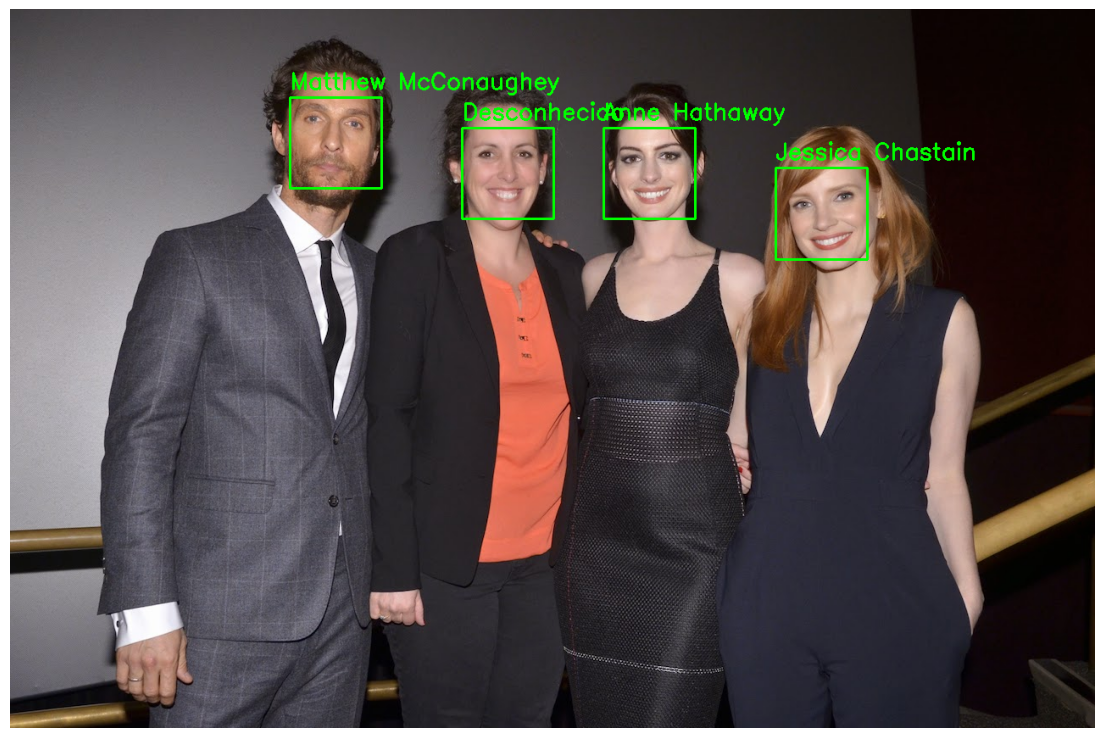

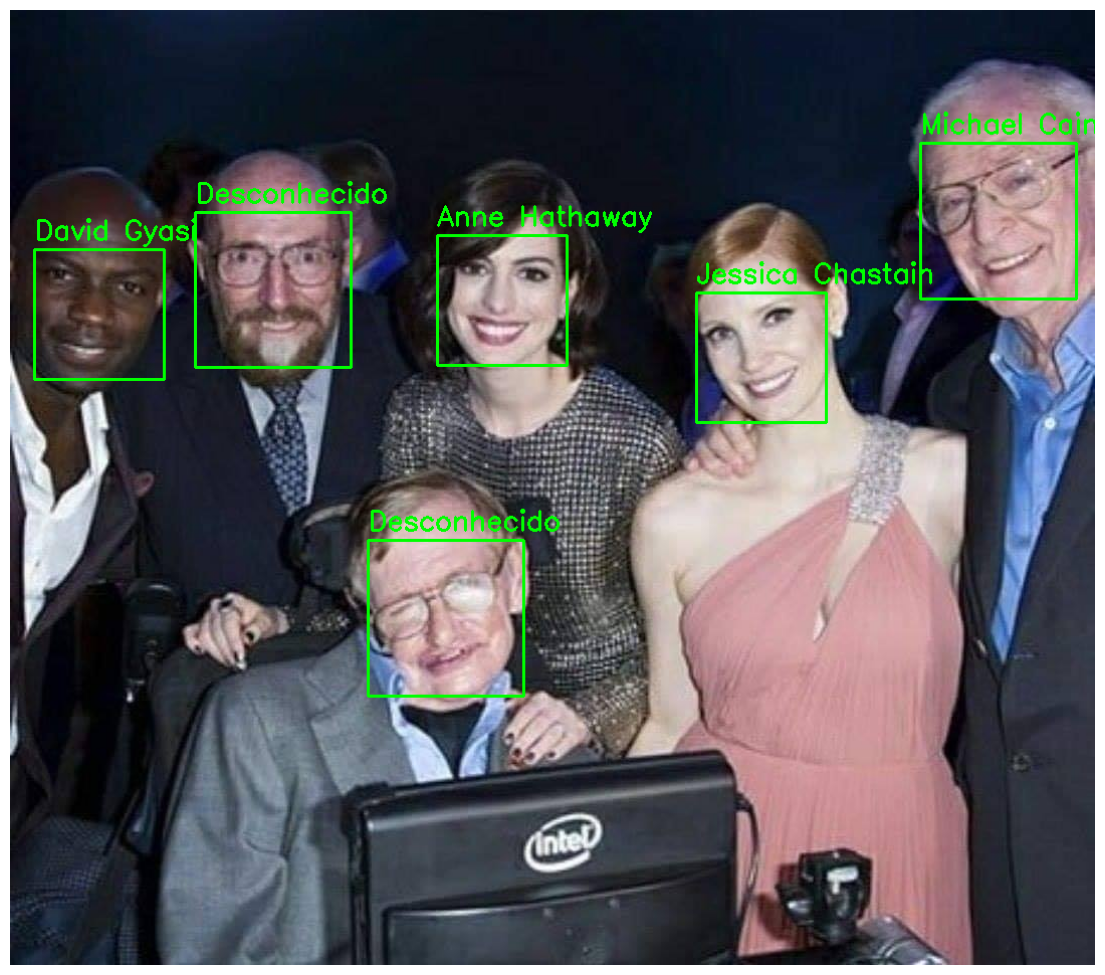

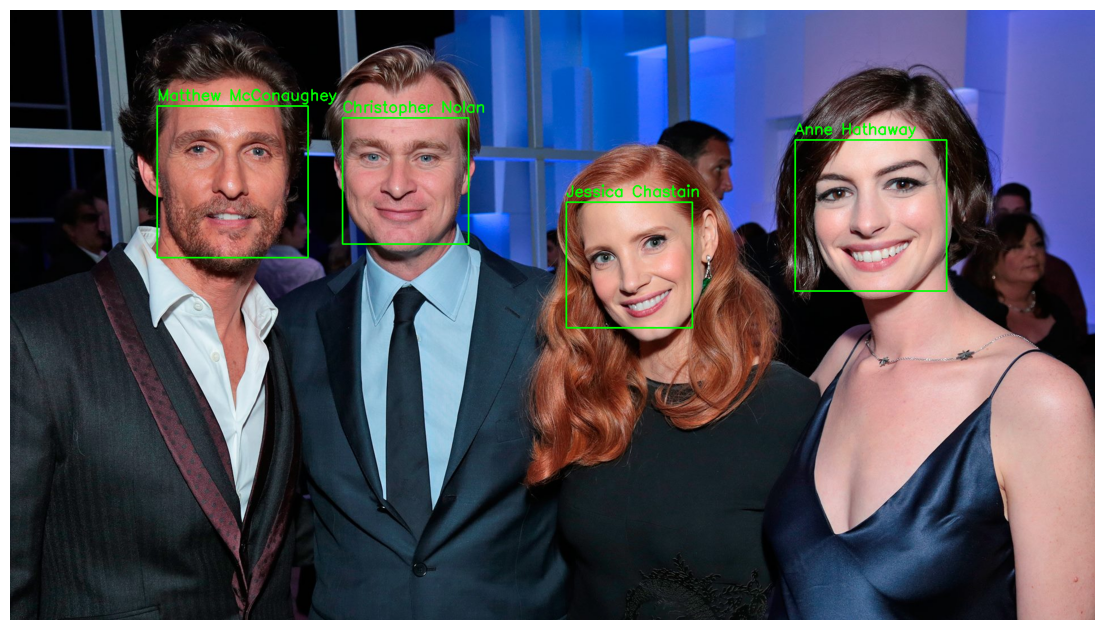

In [4]:
# Função para baixar a imagem
def download_image(url):
    try:
        img_data = requests.get(url).content
        img_array = np.array(bytearray(img_data), dtype=np.uint8)
        image = cv2.imdecode(img_array, -1)  # Converte de volta para imagem

        # Check if the image was successfully decoded
        if image is not None:
            return image
        else:
            print(f"Failed to decode image from URL: {url}")
            return None

    except Exception as e:
        print(f"Erro ao baixar a imagem: {e}")
        return None

# Função para exibir a imagem com os rostos identificados
def display_image_with_faces(image, face_locations, face_names):
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Convertendo a imagem BGR (OpenCV) para RGB (matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Aumentando o tamanho da imagem exibida
    plt.figure(figsize=(14, 14))  # Tamanho maior para a imagem
    plt.imshow(image_rgb)
    plt.axis('off')  # Desativa os eixos
    plt.show()


# Função para identificar e classificar rostos em uma imagem
def identify_faces_in_image(image_url, known_face_encodings, known_face_names):
    # Baixar a imagem
    image = download_image(image_url)
    if image is None:
        return

    # Converter a imagem para RGB, pois face_recognition usa esse formato
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Identificar rostos na imagem
    face_locations = face_recognition.face_locations(rgb_image)
    face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

    face_names = []

    for face_encoding in face_encodings:
        # Comparando o rosto detectado com os conhecidos
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Desconhecido"

        # Se houver uma correspondência, retorna o nome correspondente
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]

        face_names.append(name)

    # Exibir imagem com os rostos identificados
    display_image_with_faces(image, face_locations, face_names)

# Exemplo de rostos famosos para referência (cada URLs = 1 pessoa). Usei o elenco do filme Interestelar.
known_face_urls = [
    "https://m.media-amazon.com/images/M/MV5BMTU1MDM5NjczOF5BMl5BanBnXkFtZTcwOTY2MDE4OA@@._V1_FMjpg_UX1000_.jpg",  # Exemplo de Jessica Chastain
    "https://image.tmdb.org/t/p/w500/4Kj6BI2Ki6tpAVzc4S6lh1Xzua3.jpg",  # Exemplo de David Gyasi
    "https://image.tmdb.org/t/p/w500/6n8yZKJ3YHkm4Ds3zNjJpankHUk.jpg", # Exemplo de Mackenzie Foy
    "https://image.tmdb.org/t/p/w500/bVZRMlpjTAO2pJK6v90buFgVbSW.jpg", # Exemplo de Michael Caine
    "https://skysky.com.br/blog/wp-content/uploads/2024/08/filmes-de-Anne-Hathaway-capa.webp", # Exemplo de Anne Hathaway
    "https://m.media-amazon.com/images/M/MV5BMTg0MDc3ODUwOV5BMl5BanBnXkFtZTcwMTk2NjY4Nw@@._V1_FMjpg_UX1000_.jpg", # Exemplo de Matthew McConaughey
    "https://www.hollywoodreporter.com/wp-content/uploads/2014/10/nolan.jpg" # Exemplo de Christopher Nolan
]

# Baixar imagens de referência e gerar codificações dos rostos conhecidos
known_face_encodings = []
known_face_names = ["Jessica Chastain", "David Gyasi", "Mackenzie Foy", "Michael Caine", "Anne Hathaway", "Matthew McConaughey", "Christopher Nolan"]

for url in known_face_urls:
    image = download_image(url)
    # Check if image download was successful
    if image is not None:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        encoding = face_recognition.face_encodings(rgb_image)[0]  # Assumindo que há apenas um rosto na imagem
        known_face_encodings.append(encoding)
    else:
        print(f"Skipping URL: {url} due to download/decode failure.")

# URL da imagem com rostos para identificar
image_url = "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEim_1g43z1s3GLL1E7D4Vzm9O0ZAIIJDAvPrmEuGLnLCOim0lBIxi8Uk5uG26JwTuMg4M1HOkKk9oibSustS2uuZ7MTEuHq92rDtP5Lssx3wgWDX7BIiIxQYPjPStyZZSgwWXMIJsCcITQ/s1600/1.jpg"  # Imagem para reconhecer os rostos
image_url1 = "https://scontent.fnat5-1.fna.fbcdn.net/v/t1.6435-9/97481622_3276300382409593_8412751157927084032_n.jpg?_nc_cat=107&ccb=1-7&_nc_sid=127cfc&_nc_eui2=AeHf3WBmOBLf4Oq5AzeanlwdCPk_t0uwYHYI-T-3S7Bgdp_ZOy5R26r0UTeNJDvHTnIds8E2Hxyx0HZGcWPudKXM&_nc_ohc=pUxNiTc-jdEQ7kNvgGXBGKI&_nc_oc=AdhpjkiH94islt0Sr5ffcNP5QhOLsWFC60QvpAaoMyXuQzkzIDy0H8OtJgVA0Zlj2js&_nc_zt=23&_nc_ht=scontent.fnat5-1.fna&_nc_gid=A0JJ2A7hkSIT15R_QuAjgKV&oh=00_AYC0uCXTCaHxX3N-QQpbSZir5h9rHAj56fD9XGRsfyeD1A&oe=67BF5567"  # Imagem para reconhecer os rostos
image_url2 = "https://scontent.fnat5-1.fna.fbcdn.net/v/t39.30808-6/464677650_3788180701328077_7632636342268861312_n.jpg?_nc_cat=109&ccb=1-7&_nc_sid=0b6b33&_nc_eui2=AeH4U0EIpjlEs6j9LXCBU7pmyKWGORNz4l7IpYY5E3PiXkhjdcJSfBHvVGd-lm9qg-S4x5W7HAWfL8DP3XQKu1SE&_nc_ohc=MORMfPoBelIQ7kNvgH2t9aj&_nc_oc=AdgHSgaDBRyxct7ALFtoKt7jVGdfgu3SNtOneTGVmX6Es4pgKw_c_TZRc7cr-Q71KYA&_nc_zt=23&_nc_ht=scontent.fnat5-1.fna&_nc_gid=AG3RHsAwjtrXribewfRhBO7&oh=00_AYDqNBbHM_NhEHVZnsS2qeu5SfpHBdIwd3CaSDCYC2k3OQ&oe=679DC63B"  # Imagem para reconhecer os rostos

# Identificar e exibir rostos na imagem
identify_faces_in_image(image_url, known_face_encodings, known_face_names)
identify_faces_in_image(image_url1, known_face_encodings, known_face_names)
identify_faces_in_image(image_url2, known_face_encodings, known_face_names)
